In [1]:
# Imports
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt

In [7]:
# Import setup and seaborn_helpers
from setup.setup import *
from seaborn_helpers import *

In [3]:
# Load cdl dataframe
cdlDF = load_and_clean_cdl_data()
cdlDF

c:\Users\David Harler Jr\OneDrive\Desktop\dataClass\06-cod-analysis\2024.04.10 CDL PrizePicks Betting\cdl_prizepicks_betting\cdl-betting-app-v03\setup\setup.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  cdlDF = sqlio.read_sql_query("SELECT * FROM cdl_data", conn)


,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4291,27293,2024-04-21,Sunday,Simp,Atlanta FaZe,3,Invasion,Control,41,24,...,1,W,ATL,FaZe,Toronto Ultra,TOR,1,4,2,0
4292,27293,2024-04-21,Sunday,CleanX,Toronto Ultra,3,Invasion,Control,14,27,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0
4293,27293,2024-04-21,Sunday,Envoy,Toronto Ultra,3,Invasion,Control,21,35,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0
4294,27293,2024-04-21,Sunday,Insight,Toronto Ultra,3,Invasion,Control,20,20,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0


In [4]:
# Build series summaries
series_summaries = build_series_summaries(cdlDF)
series_summaries

,match_id,team,team_abbr,map_wins,map_losses,series_score_diff,match_date,opp
0,27193,Atlanta FaZe,ATL,3,2,1,2023-12-08,BOS
1,27193,Boston Breach,BOS,2,3,-1,2023-12-08,ATL
2,27194,Los Angeles Thieves,LAT,1,3,-2,2023-12-08,SEA
3,27194,Seattle Surge,SEA,3,1,2,2023-12-08,LAT
4,27195,New York Subliners,NYSL,3,2,1,2023-12-08,TX
...,...,...,...,...,...,...,...,...
269,27291,Los Angeles Guerrillas,LAG,0,3,-3,2024-04-21,CAR
270,27292,Boston Breach,BOS,2,3,-1,2024-04-21,MIN
271,27292,Minnesota ROKKR,MIN,3,2,1,2024-04-21,BOS
272,27293,Atlanta FaZe,ATL,3,0,3,2024-04-21,TOR


In [5]:
# Filter maps
cdlDF = filter_maps(cdlDF)
cdlDF

,match_id,match_date,match_day,player,team,map_num,map_name,gamemode,kills,deaths,...,series_result,map_wl,team_abbr,team_icon,opp,opp_abbr,opp_score,total_score,score_diff,dummy_x
0,27193,2023-12-08,Friday,aBeZy,Atlanta FaZe,1,Karachi,Hardpoint,24,24,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
1,27193,2023-12-08,Friday,Cellium,Atlanta FaZe,1,Karachi,Hardpoint,21,19,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
2,27193,2023-12-08,Friday,Drazah,Atlanta FaZe,1,Karachi,Hardpoint,25,22,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
3,27193,2023-12-08,Friday,Simp,Atlanta FaZe,1,Karachi,Hardpoint,33,23,...,1,W,ATL,FaZe,Boston Breach,BOS,238,488,12,0
4,27193,2023-12-08,Friday,Capsidal,Boston Breach,1,Karachi,Hardpoint,24,26,...,0,L,BOS,Breach,Atlanta FaZe,ATL,250,488,-12,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3187,27293,2024-04-21,Sunday,Simp,Atlanta FaZe,3,Invasion,Control,41,24,...,1,W,ATL,FaZe,Toronto Ultra,TOR,1,4,2,0
3188,27293,2024-04-21,Sunday,CleanX,Toronto Ultra,3,Invasion,Control,14,27,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0
3189,27293,2024-04-21,Sunday,Envoy,Toronto Ultra,3,Invasion,Control,21,35,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0
3190,27293,2024-04-21,Sunday,Insight,Toronto Ultra,3,Invasion,Control,20,20,...,0,L,TOR,Ultra,Atlanta FaZe,ATL,3,4,-2,0


In [6]:
# Build team summaries
team_summaries = build_team_summaries(cdlDF)
team_summaries

,team,gamemode,map_name,wins,losses,total,win_percentage
0,Atlanta FaZe,Hardpoint,6 Star,1,1,2,0.50
1,Atlanta FaZe,Hardpoint,Karachi,7,2,9,0.78
2,Atlanta FaZe,Hardpoint,Rio,5,0,5,1.00
3,Atlanta FaZe,Hardpoint,Sub Base,1,5,6,0.17
4,Atlanta FaZe,Hardpoint,Vista,1,0,1,1.00
...,...,...,...,...,...,...,...
187,Seattle Surge,Search & Destroy,Overall,11,7,18,0.61
188,Seattle Surge,Control,Overall,4,18,22,0.18
189,Toronto Ultra,Hardpoint,Overall,20,6,26,0.77
190,Toronto Ultra,Search & Destroy,Overall,12,11,23,0.52


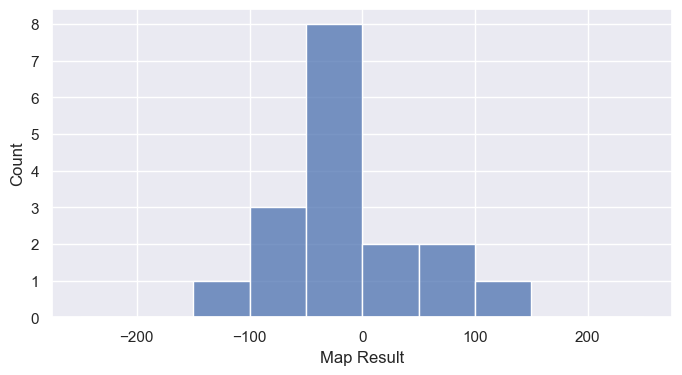

In [18]:
# Team Score Diffs: Hardpoint All
team_score_diffs(cdlDF, "Minnesota ROKKR", "Hardpoint")

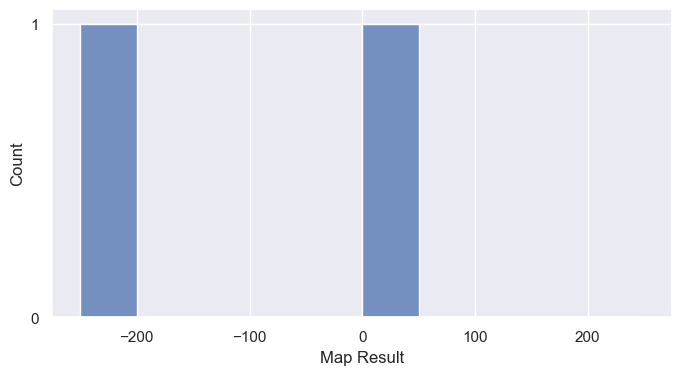

In [12]:
# Team Score Diffs: Hardpoint Single Map
team_score_diffs(cdlDF, "Las Vegas Legion", "Hardpoint", "6 Star")

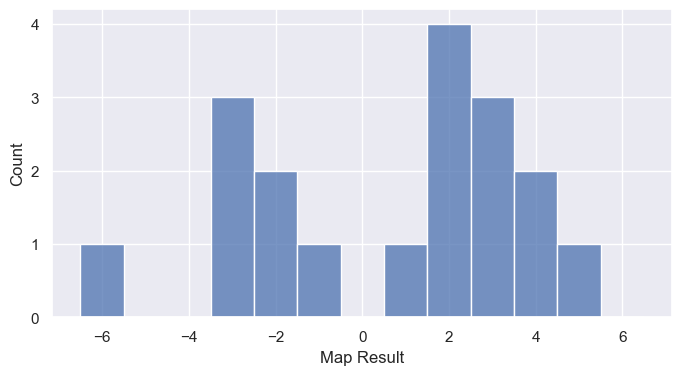

In [13]:
# Team Score Diffs: SnD All
team_score_diffs(cdlDF, "Seattle Surge", "Search & Destroy")

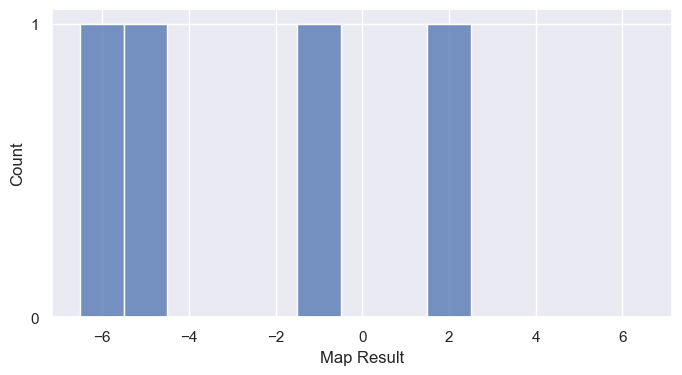

In [14]:
# Team Score Diffs: SnD Single Map
team_score_diffs(cdlDF, "Toronto Ultra", "Search & Destroy", "Rio")

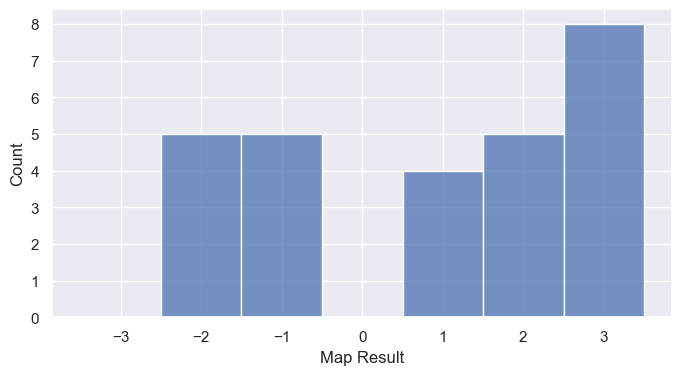

In [15]:
# Team Score Diffs: Control All
team_score_diffs(cdlDF, "OpTic Texas", "Control")

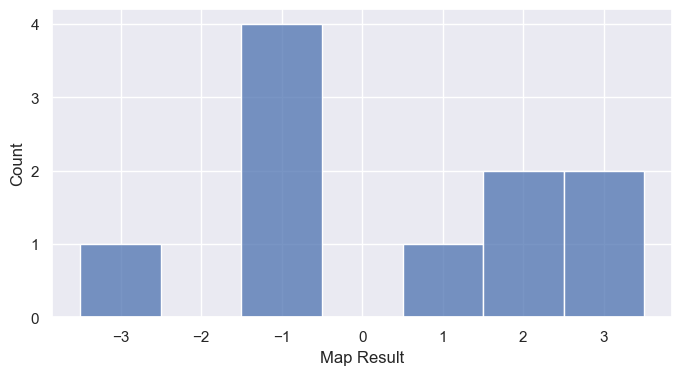

In [16]:
# Team Score Diffs: Control Single Map
team_score_diffs(cdlDF, "Carolina Royal Ravens", "Control", "Highrise")

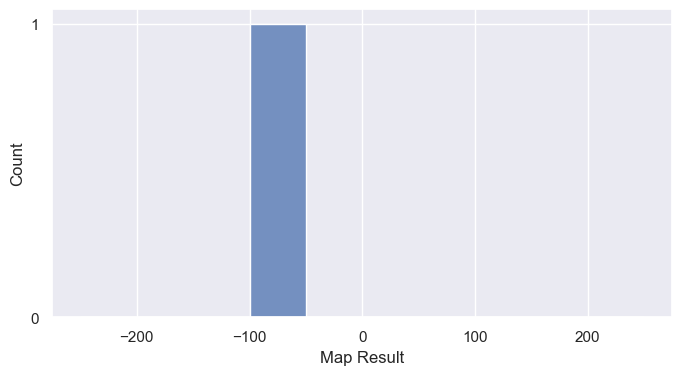

In [17]:
# Team Score Diffs: HP Single Map only Played Once
team_score_diffs(cdlDF, "New York Subliners", "Hardpoint", "Vista")

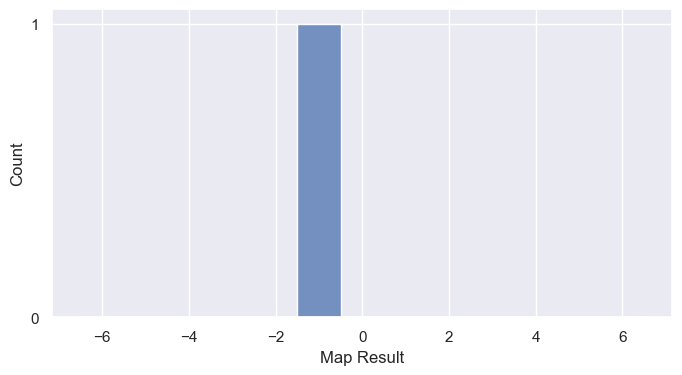

In [20]:
# Team Score Diffs: SnD Single Map only Played Once
team_score_diffs(cdlDF, "Boston Breach", "Search & Destroy", "6 Star")

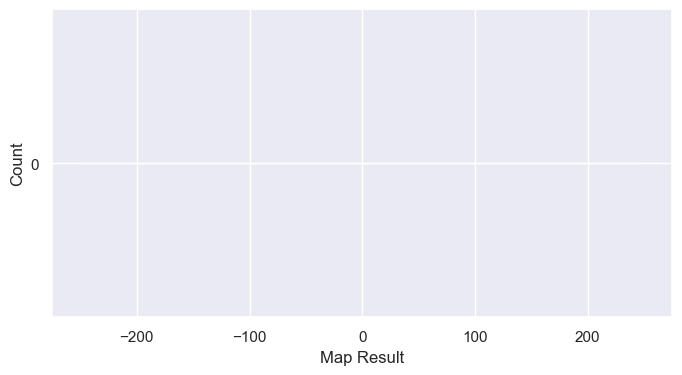

In [21]:
# Team Score Diffs: Team never played Map 
team_score_diffs(cdlDF, "Los Angeles Guerrillas", "Hardpoint", "Vista")

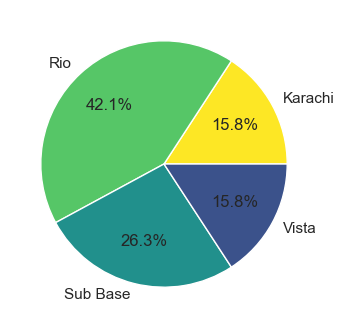

In [28]:
# Team % Maps Played: Hardpoint
team_percent_maps_played(team_summaries, "Miami Heretics", "Hardpoint")

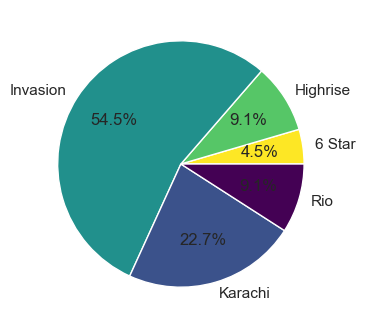

In [29]:
# Team % Maps Played: SnD
team_percent_maps_played(team_summaries, "Las Vegas Legion", "Search & Destroy")

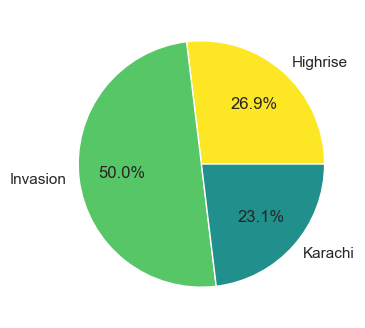

In [30]:
# Team % Maps Played: Control
team_percent_maps_played(team_summaries, "Atlanta FaZe", "Control")

In [ ]:
# Team Series Diffs: OpTic

In [ ]:
# Team Series Diffs: Ultra

In [ ]:
# Player Kills vs Time: Hardpoint All

In [ ]:
# Player Kills vs Time: Hardpoint Single Map

In [ ]:
# Player Kills vs Time: SnD All

In [ ]:
# Player Kills vs Time: SnD Single Map

In [ ]:
# Player Kills vs Time: Control All

In [ ]:
# Player Kills vs Time: Control Single Map

In [ ]:
# Player Kills vs Time: Hardpoint Single Map only Played Once

In [ ]:
# Player Kills vs Time: SnD Single Map only Played Once

In [ ]:
# Player Kills vs Time: Player never played Map

In [ ]:
# Player Kills vs Score Diff: Hardpoint All

In [ ]:
# Player Kills vs Score Diff: Hardpoint Single Map

In [ ]:
# Player Kills vs Score Diff: SnD All

In [ ]:
# Player Kills vs Score Diff: SnD Single Map

In [ ]:
# Player Kills vs Score Diff: Control All

In [ ]:
# Player Kills vs Score Diff: Control Single Map

In [ ]:
# Player Kills vs Score Diff: Hardpoint Single Map only Played Once

In [ ]:
# Player Kills vs Score Diff: SnD Single Map only Played Once

In [ ]:
# Player Kills vs Score Diff: Player never played Map